In [7]:
import os,sys
import numpy as np
from CRN_Engines.DMAK_CPU import DMAK_CPU as DMAK
from HMM.Model_to_CRN import translate_model as translate
from HMM.BaumWelch_inbuilt import BaumWelch_inbuilt as BW
from HMM.BaumWelch_inbuilt import read_model

# Example-1a

In [8]:
model_file = "../Models/Example-1a.txt"

### Baum-Welch

In [9]:
BW(model_file)

Observation_sequence:
 ['2', '1', '2', '2', '1', '2', '2', '1', '2', '1', '1', '1', '2', '1', '1', '1', '2', '1', '1', '2', '2', '2', '2', '1', '1', '2', '2', '1', '1', '1', '2', '1', '2', '2', '2', '2', '1', '1', '1', '2', '2', '2', '1', '2', '1', '2', '1', '1', '2', '2', '2', '2', '1', '1', '1', '1', '2', '1', '2', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '2', '2', '1', '2', '1', '2', '1', '2', '1', '2', '1', '2', '1', '1', '2', '2', '2', '2', '1', '2', '2', '1', '1', '1', '1', '1', '1', '2', '2', '2', '1'] 

Start_probability:
 [0.5 0.5] 

Transition_Probability:
 [[0.5 0.5]
 [0.5 0.5]] 

Emission_Probability:
 [[0.5 0.5]
 [0.5 0.5]] 


After Training with Baum-Welch algorithm:
Start probability:
 [0.5 0.5] 

Transition probability:
 [[0.5 0.5]
 [0.5 0.5]] 

Emission probability:
 [[0.52 0.48]
 [0.52 0.48]] 



### Chemical-Baum-Welch

In [10]:
# generating reaction network
observations, reaction_system = translate(model_file,False,False)
species = np.array(reaction_system[0])
reactants = np.array(reaction_system[1][0])
products = np.array(reaction_system[1][1])
rates = np.array(reaction_system[1][2])
initial = np.array(reaction_system[2])

In [11]:
# simulation parameters
duration = 5
num_step = 1000

In [12]:
# simulating
output = DMAK(reactants,products,rates,initial,duration,num_step,True,False,species)

# saving simulation results
output_file = model_file.split('.')[2][1:]+'_output.npy'
with open(output_file, 'wb') as f:
    np.save(output_file,output)

In [13]:
# load from saved simulation results
output_file = model_file.split('.')[2][1:]+'_output.npy'
output = np.load(output_file)

In [14]:
# define masks for only parameter species
theta_mask=np.flatnonzero(np.core.defchararray.find(species,"theta")!=-1)
theta_star_index=np.flatnonzero(np.core.defchararray.find(species[theta_mask],"*")!=-1)
unselect = np.in1d(range(theta_mask.shape[0]), theta_star_index)
start_mask=theta_mask[unselect]
theta_mask=theta_mask[~unselect]
psi_mask=np.flatnonzero(np.core.defchararray.find(species,"psi")!=-1)
parameter_mask=np.concatenate([theta_mask,psi_mask])

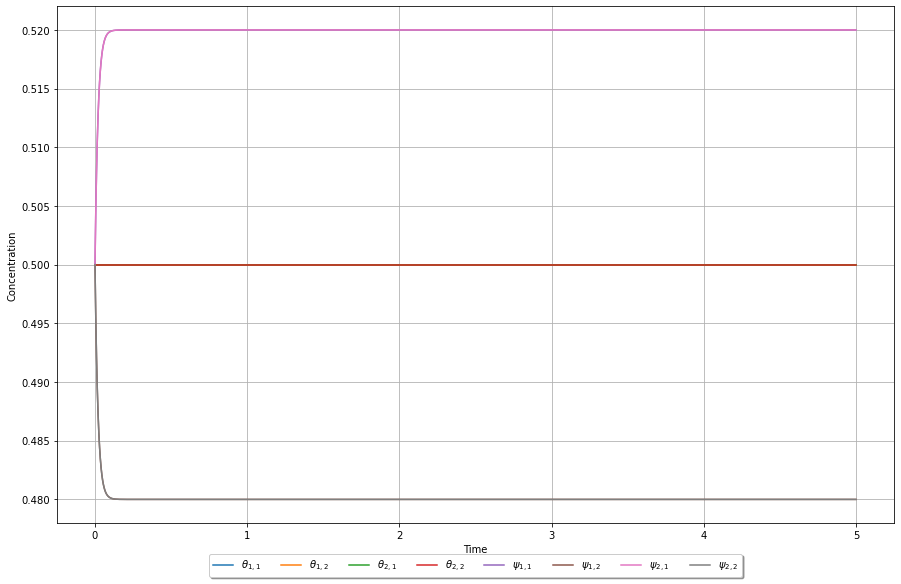

In [15]:
# set plot parameters
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# plotting
t_index = np.linspace(0, duration, num_step)
fig, ax = plt.subplots()
# for i in range(output.shape[1]):
for i in parameter_mask:
    label = species[i]
    ax.plot(t_index, output[:, i], label = '$'+label+'$')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.95])
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=10)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.grid()
plt.show()

In [16]:
HMM = read_model(model_file,"HMM/")
n_states,n_observations = list(map(len,HMM[:2]))
print("Observation_sequence:\n",observations,"\n")
print("Start_probability:\n",output[0][start_mask],"\n")
print("Transition_Probability:\n",output[0][theta_mask].reshape(n_states,n_states),"\n")
print("Emission_Probability:\n",output[0][psi_mask].reshape(n_states,n_observations),"\n")
print("==================================\n")
print("After Training with CRN:\n")
print("Transition_Probability:\n",output[-1][theta_mask].reshape(n_states,n_states),"\n")
print("Emission_Probability:\n",output[-1][psi_mask].reshape(n_states,n_observations),"\n")

Observation_sequence:
 ['2', '1', '2', '2', '1', '2', '2', '1', '2', '1', '1', '1', '2', '1', '1', '1', '2', '1', '1', '2', '2', '2', '2', '1', '1', '2', '2', '1', '1', '1', '2', '1', '2', '2', '2', '2', '1', '1', '1', '2', '2', '2', '1', '2', '1', '2', '1', '1', '2', '2', '2', '2', '1', '1', '1', '1', '2', '1', '2', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '2', '2', '1', '2', '1', '2', '1', '2', '1', '2', '1', '2', '1', '1', '2', '2', '2', '2', '1', '2', '2', '1', '1', '1', '1', '1', '1', '2', '2', '2', '1'] 

Start_probability:
 [0.5 0.5] 

Transition_Probability:
 [[0.5 0.5]
 [0.5 0.5]] 

Emission_Probability:
 [[0.5 0.5]
 [0.5 0.5]] 


After Training with CRN:

Transition_Probability:
 [[0.5 0.5]
 [0.5 0.5]] 

Emission_Probability:
 [[0.52 0.48]
 [0.52 0.48]] 



# Example-1b

In [17]:
model_file = "../Models/Example-1b.txt"

### Baum-Welch

In [18]:
BW(model_file)

Observation_sequence:
 ['2', '1', '2', '2', '1', '2', '2', '1', '2', '1', '1', '1', '2', '1', '1', '1', '2', '1', '1', '2', '2', '2', '2', '1', '1', '2', '2', '1', '1', '1', '2', '1', '2', '2', '2', '2', '1', '1', '1', '2', '2', '2', '1', '2', '1', '2', '1', '1', '2', '2', '2', '2', '1', '1', '1', '1', '2', '1', '2', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '2', '2', '1', '2', '1', '2', '1', '2', '1', '2', '1', '2', '1', '1', '2', '2', '2', '2', '1', '2', '2', '1', '1', '1', '1', '1', '1', '2', '2', '2', '1'] 

Start_probability:
 [0.5 0.5] 

Transition_Probability:
 [[0.774 0.226]
 [0.427 0.573]] 

Emission_Probability:
 [[0.916 0.084]
 [0.51  0.49 ]] 


After Training with Baum-Welch algorithm:
Start probability:
 [0.5 0.5] 

Transition probability:
 [[0.09095231 0.90904769]
 [0.99193496 0.00806504]] 

Emission probability:
 [[0.66093495 0.33906505]
 [0.36642667 0.63357333]] 



### Chemical-Baum-Welch

In [19]:
# generating reaction network
observations, reaction_system = translate(model_file,False,False)
species = np.array(reaction_system[0])
reactants = np.array(reaction_system[1][0])
products = np.array(reaction_system[1][1])
rates = np.array(reaction_system[1][2])
initial = np.array(reaction_system[2])

In [20]:
# simulation parameters
duration = 5
num_step = 1000

In [21]:
# simulating
output = DMAK(reactants,products,rates,initial,duration,num_step,True,False,species)

# saving simulation results
output_file = model_file.split('.')[2][1:]+'_output.npy'
with open(output_file, 'wb') as f:
    np.save(output_file,output)

In [22]:
# load from saved simulation results
output_file = model_file.split('.')[2][1:]+'_output.npy'
output = np.load(output_file)

In [23]:
# define masks for only parameter species
theta_mask=np.flatnonzero(np.core.defchararray.find(species,"theta")!=-1)
theta_star_index=np.flatnonzero(np.core.defchararray.find(species[theta_mask],"*")!=-1)
unselect = np.in1d(range(theta_mask.shape[0]), theta_star_index)
start_mask=theta_mask[unselect]
theta_mask=theta_mask[~unselect]
psi_mask=np.flatnonzero(np.core.defchararray.find(species,"psi")!=-1)
parameter_mask=np.concatenate([theta_mask,psi_mask])

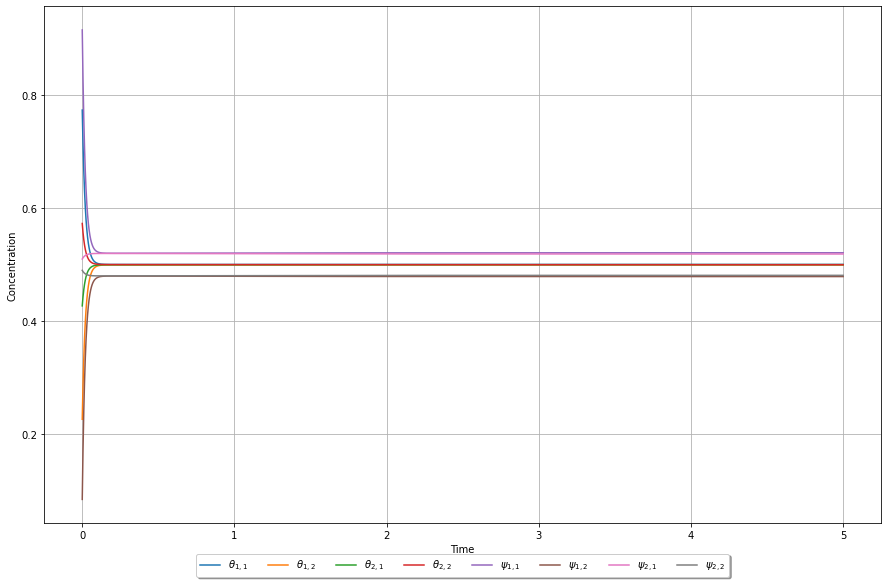

In [24]:
# set plot parameters
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# plotting
t_index = np.linspace(0, duration, num_step)
fig, ax = plt.subplots()
# for i in range(output.shape[1]):
for i in parameter_mask:
    label = species[i]
    ax.plot(t_index, output[:, i], label = '$'+label+'$')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.95])
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=10)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.grid()
plt.show()

In [25]:
HMM = read_model(model_file,"HMM/")
n_states,n_observations = list(map(len,HMM[:2]))
print("Observation_sequence:\n",observations,"\n")
print("Start_probability:\n",output[0][start_mask],"\n")
print("Transition_Probability:\n",output[0][theta_mask].reshape(n_states,n_states),"\n")
print("Emission_Probability:\n",output[0][psi_mask].reshape(n_states,n_observations),"\n")
print("==================================\n")
print("After Training with CRN:\n")
print("Transition_Probability:\n",output[-1][theta_mask].reshape(n_states,n_states),"\n")
print("Emission_Probability:\n",output[-1][psi_mask].reshape(n_states,n_observations),"\n")

Observation_sequence:
 ['2', '1', '2', '2', '1', '2', '2', '1', '2', '1', '1', '1', '2', '1', '1', '1', '2', '1', '1', '2', '2', '2', '2', '1', '1', '2', '2', '1', '1', '1', '2', '1', '2', '2', '2', '2', '1', '1', '1', '2', '2', '2', '1', '2', '1', '2', '1', '1', '2', '2', '2', '2', '1', '1', '1', '1', '2', '1', '2', '1', '2', '1', '1', '1', '1', '1', '1', '2', '1', '2', '2', '1', '2', '1', '2', '1', '2', '1', '2', '1', '2', '1', '1', '2', '2', '2', '2', '1', '2', '2', '1', '1', '1', '1', '1', '1', '2', '2', '2', '1'] 

Start_probability:
 [0.5 0.5] 

Transition_Probability:
 [[0.774 0.226]
 [0.427 0.573]] 

Emission_Probability:
 [[0.916 0.084]
 [0.51  0.49 ]] 


After Training with CRN:

Transition_Probability:
 [[0.50037793 0.49962207]
 [0.50000794 0.49999206]] 

Emission_Probability:
 [[0.52109785 0.47890215]
 [0.51890074 0.48109926]] 



# Example-2

In [26]:
model_file = "../Models/Example-2.txt"

### Baum-Welch

In [27]:
BW(model_file)

Observation_sequence:
 ['2', '1', '2', '1', '2'] 

Start_probability:
 [0.6 0.4] 

Transition_Probability:
 [[0.7 0.3]
 [0.4 0.6]] 

Emission_Probability:
 [[0.6 0.4]
 [0.6 0.4]] 


After Training with Baum-Welch algorithm:
Start probability:
 [0.6 0.4] 

Transition probability:
 [[1.36326504e-216 1.00000000e+000]
 [1.00000000e+000 3.42508790e-053]] 

Emission probability:
 [[2.48850902e-159 1.00000000e+000]
 [1.00000000e+000 3.42508790e-053]] 



### Chemical-Baum-Welch

In [28]:
# generating reaction network
observations, reaction_system = translate(model_file,False,False)
species = np.array(reaction_system[0])
reactants = np.array(reaction_system[1][0])
products = np.array(reaction_system[1][1])
rates = np.array(reaction_system[1][2])
initial = np.array(reaction_system[2])

In [29]:
# simulation parameters
duration = 200
num_step = 1000

In [30]:
# simulating
output = DMAK(reactants,products,rates,initial,duration,num_step,True,False,species)

# saving simulation results
output_file = model_file.split('.')[2][1:]+'_output.npy'
with open(output_file, 'wb') as f:
    np.save(output_file,output)

In [31]:
# load from saved simulation results
output_file = model_file.split('.')[2][1:]+'_output.npy'
output = np.load(output_file)

In [32]:
# define masks for only parameter species
theta_mask=np.flatnonzero(np.core.defchararray.find(species,"theta")!=-1)
theta_star_index=np.flatnonzero(np.core.defchararray.find(species[theta_mask],"*")!=-1)
unselect = np.in1d(range(theta_mask.shape[0]), theta_star_index)
start_mask=theta_mask[unselect]
theta_mask=theta_mask[~unselect]
psi_mask=np.flatnonzero(np.core.defchararray.find(species,"psi")!=-1)
parameter_mask=np.concatenate([theta_mask,psi_mask])

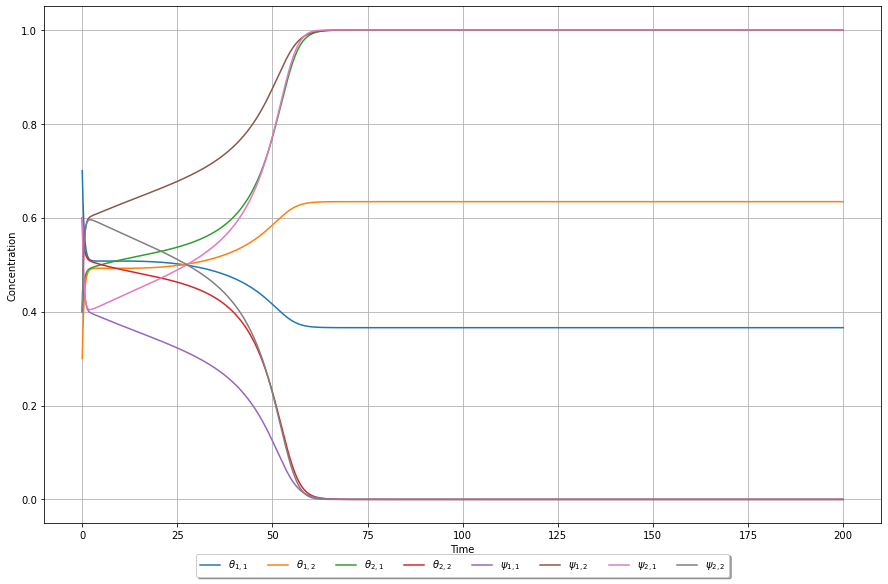

In [33]:
# set plot parameters
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# plotting
t_index = np.linspace(0, duration, num_step)
fig, ax = plt.subplots()
# for i in range(output.shape[1]):
for i in parameter_mask:
    label = species[i]
    ax.plot(t_index, output[:, i], label = '$'+label+'$')
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.95])
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=10)
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.grid()
plt.show()

In [34]:
HMM = read_model(model_file,"HMM/")
n_states,n_observations = list(map(len,HMM[:2]))
print("Observation_sequence:\n",observations,"\n")
print("Start_probability:\n",output[0][start_mask],"\n")
print("Transition_Probability:\n",output[0][theta_mask].reshape(n_states,n_states),"\n")
print("Emission_Probability:\n",output[0][psi_mask].reshape(n_states,n_observations),"\n")
print("==================================\n")
print("After Training with CRN:\n")
print("Transition_Probability:\n",output[-1][theta_mask].reshape(n_states,n_states),"\n")
print("Emission_Probability:\n",output[-1][psi_mask].reshape(n_states,n_observations),"\n")

Observation_sequence:
 ['2', '1', '2', '1', '2'] 

Start_probability:
 [0.6 0.4] 

Transition_Probability:
 [[0.7 0.3]
 [0.4 0.6]] 

Emission_Probability:
 [[0.6 0.4]
 [0.6 0.4]] 


After Training with CRN:

Transition_Probability:
 [[3.65772957e-01 6.34227043e-01]
 [1.00000000e+00 1.86219812e-13]] 

Emission_Probability:
 [[ 1.16766743e-13  1.00000000e+00]
 [ 1.00000000e+00 -3.55367567e-15]] 

